---
# 1. Introduction:
---

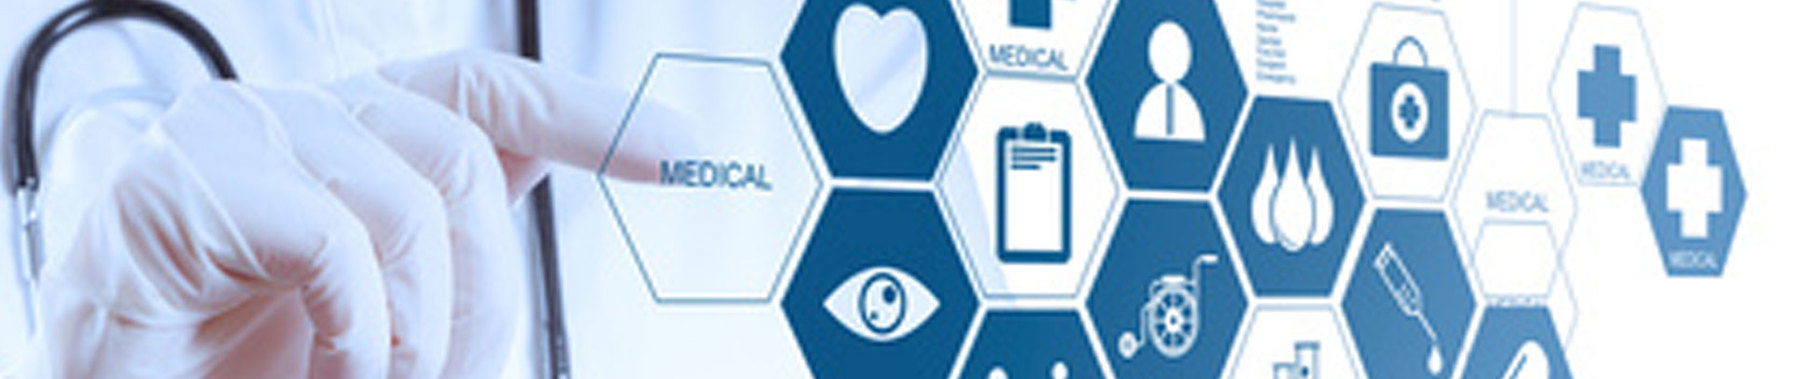

**Company Introduction**

Your client for this project is an insurance provider.

XYZ Health Insurance Co. Ltd. is one of the prominent insurance providers in the country.
They offer impressive health plans and services to cater to the needs of different people.
The insurance company also provides access to fitness assessment centers, wellness centers, diagnostic centers in addition to hospitalization centers.


**Current Scenario**

The company is planning to introduce a new system that will help to easily monitor and predict the medical insurance prices of their customers.



---


# 2. Problem Statement:


---



The current process suffers from the following problems:

1. The company uses manpower to predict the medical expenses of its insurers. Many factors are considered such as age, BMI, smoking habits, number of children, etc.
2. It is a time and resource-intensive process and many times, inaccurate.
The company plans to modernize its legacy systems and wants to implement an automated way of predicting the medical expenses of its insurers based on various factors.
3. They have hired you as a data science consultant. They want to supplement their analysis and prediction with a more robust and accurate approach.



**Your Role**
1. You are given a historical dataset that contains the medical charges of some of the insurers and many factors that determine those charges.
2. Your task is to build a regression model using the dataset.
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.



**Project Deliverables**
- Deliverable: Predicts the medical charges of insurers.
- Machine Learning Task: Regression
- Target Variable: charges


**Win Condition: N/A (best possible model)**

**Evaluation Metric**
The model evaluation will be based on the ***R2 score***.




---
# 3. Importing Libraries and Loading Dataset
---

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV


## 3.1 Data Description


**Description:**

- The dataset has columns describing features such as age, BMI, smoking habit, the region where the insurer resides, and their number of children.

- Also included in the dataset is the column charges which indicates their medical charges

- This is the data that we have to predict for charges.

## Train and Test
The dataset is divided into two parts: Train and Test sets.

### Train Set:
- The train set contains 1003 rows and 8 columns.
- The last column charges is the target variable.

### Test Set:
- The test set contains 335 rows and 7 columns.
- The test set doesn’t contain the charges column.
- It needs to be predicted for the test set.

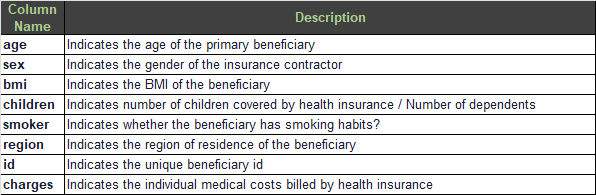

### Sample Submission File:
- A sample submission csv file named sample_submission.csv is also provided with the dataset.
- This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.

**Dataset Download Link**
The dataset can be downloaded from this [link](https://www.accredian.com/wp-content/uploads/2021/10/Medical-Cost-Prediction.zip).


## 3.2 Unzipping data


In [ ]:
!unzip '/content/Medical-Cost-Prediction.zip'

Archive:  /content/Medical-Cost-Prediction.zip
  inflating: test_data.csv           
  inflating: train_data.csv          
  inflating: sample_submission.csv.xlsx  



## 3.3 Reading Data


In [ ]:
train = pd.read_csv('/content/train_data.csv')
print("The data set has the following dimensions", train.shape)

The data set has the following dimensions (1003, 8)


In [ ]:
# First five rows preview of train data:
train.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


In [ ]:
test =  pd.read_csv('/content/test_data.csv')
print("The data set has the following dimensions", test.shape)

The data set has the following dimensions (335, 7)


In [ ]:
# First five rows preview of Test data:
test.head()

,age,sex,bmi,children,smoker,region,id
0,45,female,25.175,2,no,northeast,764
1,36,female,30.020,0,no,northwest,887
2,64,female,26.885,0,yes,northwest,890
3,46,male,25.745,3,no,northwest,1293
4,19,male,31.920,0,yes,northwest,259



## 3.4 Data Information


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1003 non-null   int64  
 1   sex       1003 non-null   object 
 2   bmi       1003 non-null   float64
 3   children  1003 non-null   int64  
 4   smoker    1003 non-null   object 
 5   region    1003 non-null   object 
 6   id        1003 non-null   int64  
 7   charges   1003 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.8+ KB


#### Observations:
- There are 5 numeric and 3 categorical variables in the data set.
- There are no missing values present in the data set.
- Id is unique.
- There are 1003 rows and 8 rows.
- The data type of the features looks fine and needs no changes.

## 3.5 Data Description

In [ ]:
train.describe()

,age,bmi,children,id,charges
count,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,39.255234,30.511780,1.104686,666.874377,13267.935817
std,14.039105,6.013107,1.204619,386.570442,12051.356547
min,18.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,26.210000,0.000000,329.500000,4780.839400
50%,39.000000,30.200000,1.000000,675.000000,9447.382400
75%,51.000000,34.430000,2.000000,1001.500000,16840.667970
max,64.000000,53.130000,5.000000,1337.000000,62592.873090


#### Observations:
- This looks this is a fairly uniformly distributed data set.
The mean values for 'Age' & 'BMI' have a very marignal deviation from the median.
The 'Age' variable has a range from 18 to 64 centering around 39 whereas 'BMI' has a range from 15 to 53 centering around 30.

- For the target variable, 'Charges' however we can see that mean is highly skewed towards the right. There might be some outliers for this variable. The target variable 'charges' has a range from 1121 to 65592. If we closely observe, we can see that the third quartile is at 16.8k however the max is at 65.5k indicating high chances it might be an outlier.





In [ ]:
#Checking the skew values
train.skew()

<ipython-input-10-392658ead449>:2: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


age         0.036805
bmi         0.289540
children    0.910284
id         -0.021560
charges     1.526521
dtype: float64

### Observations:
- This is inline from what we concluded using the data descriptive summary.

## 3.6 Data Preprocessing

In [ ]:
# Checking for duplicate values in dataset.
train.duplicated().sum()

0

In [ ]:
# Checking for na values
train.isna().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
id          0
charges     0
dtype: int64

### Observation:
- There are no duplicates or missing values in the data set.

---
# 4. Exploratory Data Analysis:
---

Lets do some analysis using visuals to better understand the dataset their distribution and check if there are any correlations between the dataset.

### 4.1 Co-relation between variables

<ipython-input-13-878819037576>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train.corr(),annot=True)


<Axes: >

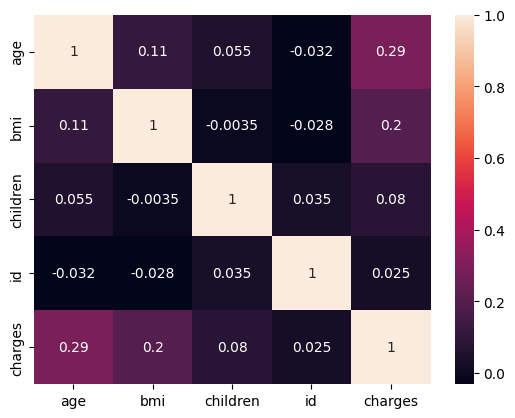

In [ ]:
# Heat map to analyze correlation between features.
sns.heatmap(train.corr(),annot=True)

### Observations:
- No significant correlation is observed amongst the independent variables.
- There is a slight relation between the target variable and age and bmi which is okay.

### 4.2 Distribution of variables

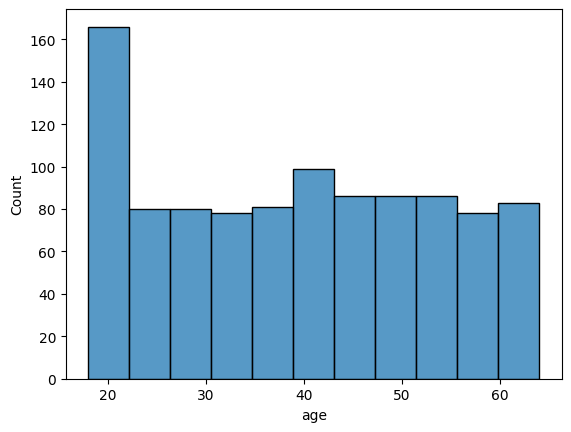

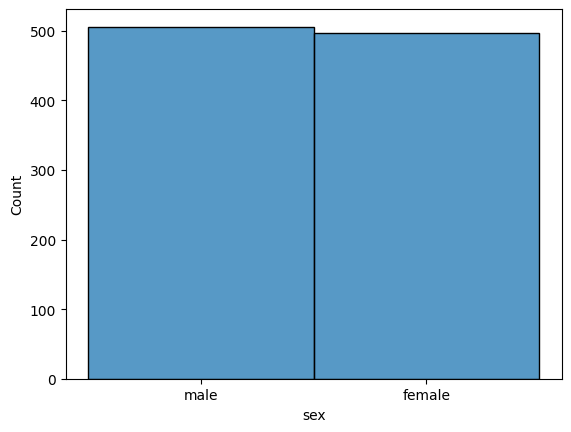

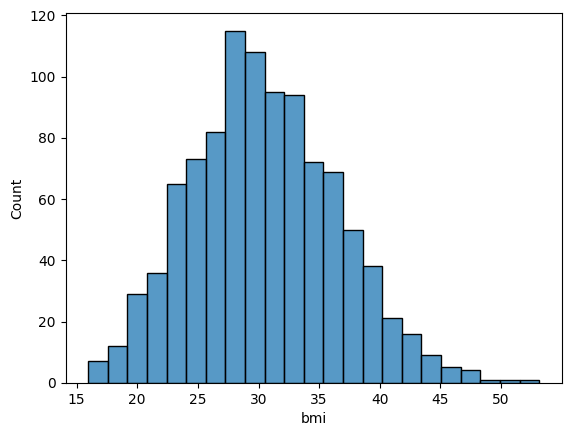

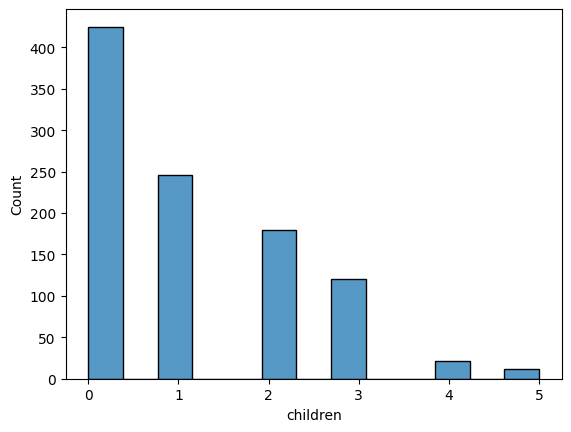

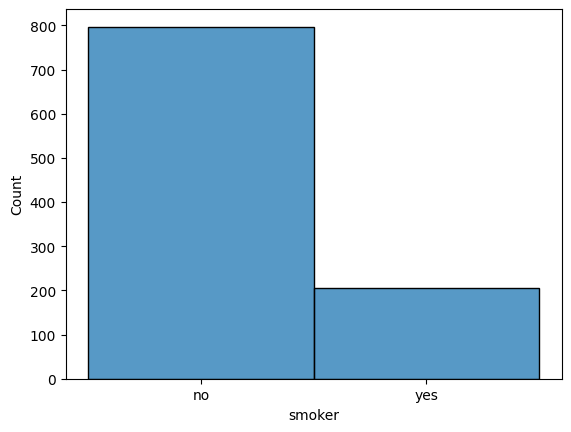

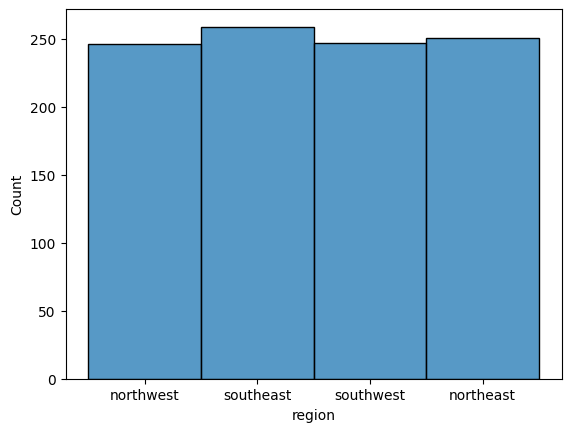

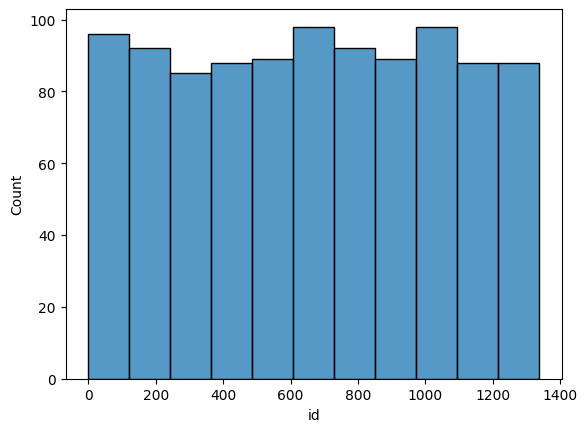

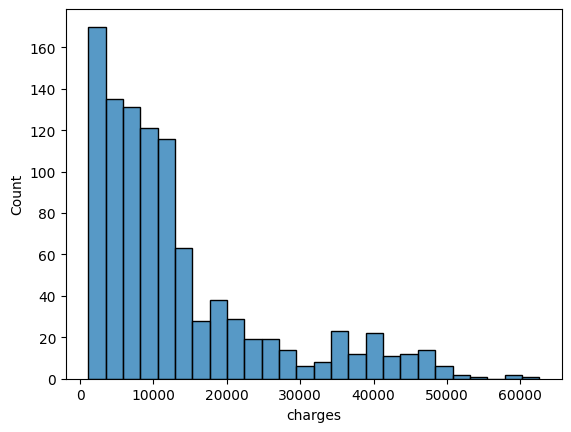

In [ ]:
for i in train.columns:
  sns.histplot(data=train, x=i)
  print("\n")
  plt.show()

### Observations:
- Age seems to have higher number of people in their 20's. The rest of the age groups are fairly equally distributed.
- There are higher people with 0 children.
- There are more non-smokers than smokers in the dataset.
- All the regions have a fairly even count with Southeast region having the highest count.
- The charges variable is highly right skewed.

### 4.3 Are smokers charged more than non smokers?

In [ ]:
train.groupby(by='smoker')['charges'].mean()

smoker
no      8479.212525
yes    31795.180787
Name: charges, dtype: float64

In [ ]:
train.smoker.value_counts()

no     797
yes    206
Name: smoker, dtype: int64

### Observation:
- We can see that the even though, the number of non smokers is more the mean of the charges is higher for smokers.

- Let us quickly do a t-test to validate this.

  H0: The mean health insurance charges for smokers are equal to the mean health insurance charges for non-smokers.
  
  Ha: The mean health insurance charges for smokers are not equal to the mean health insurance charges for non-smokers.

In [ ]:
# Filtering the data set for smokers and non smokers
smokers = train[train['smoker']=='yes']['charges']
non_smokers = train[train['smoker']=='no']['charges']

In [ ]:
#Importing stats module
from scipy import stats

# Applying t-test
t_statistic, p_value = stats.ttest_ind(smokers, non_smokers)

#Setting Alpha.
alpha = 0.05

# Results
if p_value < alpha:
    print("The mean health insurance charges for smokers are not equal to the mean health insurance charges for non-smokers")
else:
    print("The mean health insurance charges for smokers are equal to the mean health insurance charges for non-smokers")

The mean health insurance charges for smokers are not equal to the mean health insurance charges for non-smokers


### T-test Conclusion:

- Smokers are charged more than non-smokers.

### 4.4 Is any region charged less or more than the remaining regions?

In [ ]:
train.groupby(by= 'region')['charges'].mean()

region
northeast    13381.931801
northwest    12634.670171
southeast    14349.255857
southwest    12648.941755
Name: charges, dtype: float64

From the means, there isn't a difference between the charges wrt region.Let us quickly do an ANOVA to validate the above.

H0: There is no significant difference in the average charge across regions.

Ha: There is a significant difference in the average charges across the regions.

In [ ]:
#Mean charges by region
grouped_data = [train['charges'][train['region'] == region] for region in train['region'].unique()]

#Applying Anova
result = stats.f_oneway(*grouped_data)

#Setting Alpha.
alpha = 0.05

# Results
print("The P-value is :", round(result.pvalue,2))

if result.pvalue < alpha:
    print("There is a significant difference in the average charges across the regions.")
else:
    print("There is no significant difference in the average charge across regions.")

The P-value is : 0.33
There is no significant difference in the average charge across regions.


### 4.5 Bi-variate Analysis:

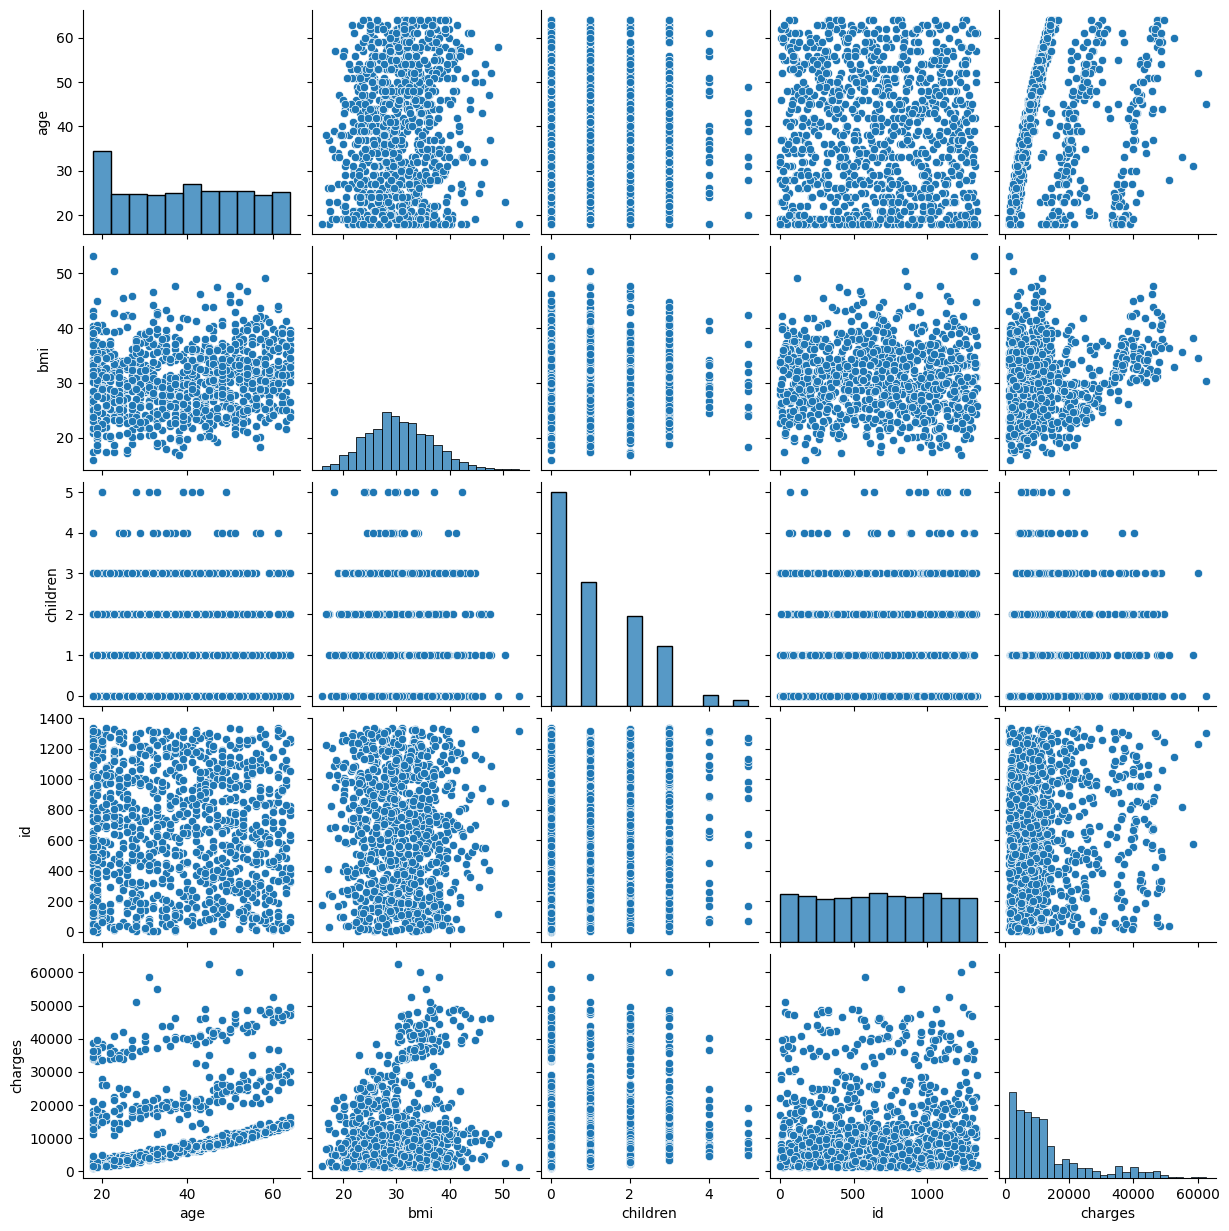

In [ ]:
sns.pairplot(train)

### Observation:
- No two independent variables are correlated with each other.

### 4.6 Is there a bias basis sex for charges?

In [ ]:
train.groupby(by='sex')['charges'].mean()

sex
female    12741.030880
male      13785.468928
Name: charges, dtype: float64

In [30]:
# Filtering the data set for smokers and non smokers
male = train[train['sex']=='male']['charges']
female = train[train['sex']=='female']['charges']

#Importing stats module
from scipy import stats

# Applying t-test
t_statistic, p_value = stats.ttest_ind(male, female)

#Setting Alpha.
alpha = 0.05

# Results
if p_value < alpha:
    print("The mean health insurance charges for male are not equal to the mean health insurance charges for females")
else:
    print("The mean health insurance charges for male are equal to the mean health insurance charges for females")

The mean health insurance charges for male are equal to the mean health insurance charges for females


# 5. Data Preparation

In [ ]:
train.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,male,23.655,0,no,northwest,693,2352.96845
1,28,female,26.510,2,no,southeast,1297,4340.44090
2,51,male,39.700,1,no,southwest,634,9391.34600
3,47,male,36.080,1,yes,southeast,1022,42211.13820
4,46,female,28.900,2,no,southwest,178,8823.27900


### 5.1 Replacing binary categorical variables with 1's and 0's  

In [31]:
train.sex = np.where(train.sex =='male',1,0)
train.smoker = np.where(train.smoker == 'yes',1,0)

In [32]:
train.head()

,age,sex,bmi,children,smoker,region,id,charges
0,24,1,23.655,0,0,northwest,693,2352.96845
1,28,0,26.510,2,0,southeast,1297,4340.44090
2,51,1,39.700,1,0,southwest,634,9391.34600
3,47,1,36.080,1,1,southeast,1022,42211.13820
4,46,0,28.900,2,0,southwest,178,8823.27900


### 5.2 Using get dummies on Region to One Hot Encode it.

In [33]:
train_df =  pd.get_dummies(train, columns=['region'])

In [34]:
train_df.head()

,age,sex,bmi,children,smoker,id,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,24,1,23.655,0,0,693,2352.96845,0,1,0,0
1,28,0,26.510,2,0,1297,4340.44090,0,0,1,0
2,51,1,39.700,1,0,634,9391.34600,0,0,0,1
3,47,1,36.080,1,1,1022,42211.13820,0,0,1,0
4,46,0,28.900,2,0,178,8823.27900,0,0,0,1


### 5.3 Dropping id variable since its just a identifier

In [35]:
train_df.drop('id', axis = 1, inplace= True)

In [36]:
train_df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,24,1,23.655,0,0,2352.96845,0,1,0,0
1,28,0,26.510,2,0,4340.44090,0,0,1,0
2,51,1,39.700,1,0,9391.34600,0,0,0,1
3,47,1,36.080,1,1,42211.13820,0,0,1,0
4,46,0,28.900,2,0,8823.27900,0,0,0,1


### 5.4 Performing same operations on test data.

In [37]:
test.sex = np.where(test.sex =='male',1,0)
test.smoker = np.where(test.smoker == 'yes',1,0)
test_df = pd.get_dummies(test, columns=['region'])
test_df = test_df.drop('id', axis =1 )
test_df.shape

(335, 9)

# 6. Test Train Split and Model Deployment

In [38]:
x = train_df.drop(columns='charges')
y = train_df['charges']

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 666)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(802, 9)
(201, 9)
(802,)
(201,)


### 6.1 Model Evaluation Custom Function


In [42]:
def model_eval(actual, predicted):
  rmse = np.sqrt(mean_squared_error(actual, predicted))
  r2 = r2_score(actual, predicted)
  print("The RMSE for the model is: ", round(rmse,2))
  print("The R2 Score for the models is: ", round(r2,2))

### 6.2 Linear Regression

In [43]:
#Creating the Linear Regression Object
lr = LinearRegression()
#Fitting the model to the data
lr.fit(x_train, y_train)

LinearRegression()

In [111]:
# Making predictions
y_hat_train_lr = lr.predict(x_train)
y_hat_test_lr = lr.predict(x_test)

In [112]:
#Model Evaluation
print("Train: ")
model_eval(y_train, y_hat_train)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test)


Train: 
The RMSE for the model is:  6100.83
The R2 Score for the models is:  0.74


Test: 
The RMSE for the model is:  6040.25
The R2 Score for the models is:  0.76


 #### Observation:
 This is low bias low variance model. Looks like underfit.

In [ ]:
test_pred_lr = lr.predict(test_df)

### 6.3 DecisionTree Regressor

In [122]:
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [123]:
y_hat_train_dt = dt.predict(x_train)
y_hat_test_dt = dt.predict(x_test)

print("Train: ")
model_eval(y_train, y_hat_train_dt)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test_dt)

Train: 
The RMSE for the model is:  477.94
The R2 Score for the models is:  1.0


Test: 
The RMSE for the model is:  6853.09
The R2 Score for the models is:  0.69


#### Observation:
This is high bias high variance. Clearly a overfit.

In [ ]:
test_pred_dt = dt.predict(test_df)

### 6.4 Random Forest Regressor

In [107]:
rf = RandomForestRegressor(max_depth = 5)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=5)

In [108]:
y_hat_train_rf = rf.predict(x_train)
y_hat_test_rf = rf.predict(x_test)

print("Train: ")
model_eval(y_train, y_hat_train_rf)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test_rf)

Train: 
The RMSE for the model is:  3882.48
The R2 Score for the models is:  0.89


Test: 
The RMSE for the model is:  4816.23
The R2 Score for the models is:  0.85


#### Observation:
This is high bias low variance. This model looks good.

In [ ]:
test_pred_rf = rf.predict(test_df)

### 6.5 KNN Regressor

In [95]:
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [96]:
y_hat_train_knn = knn.predict(x_train)
y_hat_test_knn = knn.predict(x_test)
print("Train: ")
model_eval(y_train, y_hat_train_knn)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test_knn)

Train: 
The RMSE for the model is:  9474.16
The R2 Score for the models is:  0.37


Test: 
The RMSE for the model is:  11007.19
The R2 Score for the models is:  0.2


#### Observation:
This is low bias High variance. Not good at all. Very poor model.

### 6.6 Adaptive Boosting Regressor

In [100]:
ar = AdaBoostRegressor(learning_rate = 0.01)
ar.fit(x_train, y_train)
y_hat_train_ar = ar.predict(x_train)
y_hat_test_ar = ar.predict(x_test)

print("Train: ")
model_eval(y_train, y_hat_train_ar)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test_ar)

Train: 
The RMSE for the model is:  4409.38
The R2 Score for the models is:  0.86


Test: 
The RMSE for the model is:  5029.35
The R2 Score for the models is:  0.83


#### Observation:
This is high bias low variance. This model looks good.

In [104]:
test_pred_ar = ar.predict(test_df)

### 6.7 Gradient Boosting Regressor

In [103]:
gr = GradientBoostingRegressor(learning_rate = 0.06)
gr.fit(x_train, y_train)
y_hat_train_gr = gr.predict(x_train)
y_hat_test_gr =gr.predict(x_test)

print("Train: ")
model_eval(y_train, y_hat_train_gr)
print("\n")
print("Test: ")
model_eval(y_test, y_hat_test_gr)

Train: 
The RMSE for the model is:  3894.22
The R2 Score for the models is:  0.89


Test: 
The RMSE for the model is:  4721.73
The R2 Score for the models is:  0.85


#### Observation:
This is high bias low variance. This model looks great.

In [105]:
test_pred_gr = gr.predict(test_df)

### 6.8 Comparing Model Accuracies

In [125]:
model_accuracy = {
    'Model': ['Linear Regression','Decision Tree', 'Random Forest','KNN','AdaBoost','Gradient Boost'],
    'Train_R2_score': [r2_score(y_train, y_hat_train_lr),r2_score(y_train, y_hat_train_dt),r2_score(y_train, y_hat_train_rf),
                       r2_score(y_train, y_hat_train_knn),r2_score(y_train, y_hat_train_ar),r2_score(y_train, y_hat_train_gr)],
    'Test_R2_score': [r2_score(y_test, y_hat_test_lr),r2_score(y_test, y_hat_test_dt),r2_score(y_test, y_hat_test_rf),
                      r2_score(y_test, y_hat_test_knn),r2_score(y_test, y_hat_test_ar),r2_score(y_test, y_hat_test_gr)]
}
pd.DataFrame(model_accuracy)

,Model,Train_R2_score,Test_R2_score
0,Linear Regression,0.740207,0.760528
1,Decision Tree,0.998406,0.691739
2,Random Forest,0.894788,0.847749
3,KNN,0.373485,0.204759
4,AdaBoost,0.864292,0.833976
5,Gradient Boost,0.894150,0.853665


After comparing the R2 scores, of models we decided to go with Gradient Boosting Regressor.

# 7. Final Model Selection and Deployment

In [106]:
sub_df = pd.concat([test.id,pd.Series(test_pred_gr)], axis = 1 )
sub_df.to_csv('submission.csv', index=False, header=False)